In [1]:
import tensorflow as tf
import numpy as np
import os

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2024-04-28 19:56:26.667053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 19:56:28.466251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


In [2]:
from cnn import LFV_CNN
from dataset_master import DatasetMaster

/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
a = DatasetMaster()
a.master_df.head()

Found: 3675 songs between the train_triplets and the million song dataset
Found: 2363 songs between the free music archive (full track list), train_triplets and the million song dataset


/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/dataset_master.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  master_df = pd.concat([master_df, pd.DataFrame([row])])


Found: 2363 songs between the free music archive (audio samples), train_triplets and the million song dataset


  1%|▏         | 34/2363 [00:04<03:36, 10.78it/s][src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/dataset_master.py:135: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None, offset=offset, duration=duration)  # keeps original sampling rate. offset is when to start loading and dur. is how long
/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  4%|▍         | 89/2363 [00:09<03:22, 11.25it/s]/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input

From 2363 songs 15557 data samples were created


,track_id,track_title,artist_name_x,play_count,index_into_fma_track_df,artist_name_y
0,SOHKNRJ12A6701D1F8,drop of rain,tweeterfriendly music,0.000000,70568,vesme dreamchatcher kiong
1,SOHUOAP12A8AE488E9,floating,blue rodeo,0.405116,12168,brunk
2,SOHUOAP12A8AE488E9,floating,blue rodeo,0.405116,41554,john ming
3,SOHUOAP12A8AE488E9,floating,blue rodeo,0.405116,81737,podington bear
4,SOHUOAP12A8AE488E9,floating,blue rodeo,0.405116,103945,section 27 netlabel


In [4]:
CNN_Model = LFV_CNN()

/home/zeb/Documents/School/CSCI5123/CNN-Music-Recommender/CNNenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-28 20:00:23.148958: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3987 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
for index, i in enumerate((a.CNN_Train_Data[0], a.CNN_Train_Data[1], a.CNN_Train_Data[2], a.CNN_Train_Data[3])):
    print(i.shape)
    for lower_index, j in enumerate(i):
        np.savetxt(f'train_data/{index}_{lower_index}.txt', a.CNN_Train_Data[index][lower_index], fmt='%f')

(10980, 128, 259)
(10980, 50)
(2214, 128, 259)
(2214, 50)


In [ ]:
if 0:
    for _, _, files in os.walk('train_data'):
        for file in files:
            file = file[:-4].split("_")
            print(file)
            # print(f'\t{file[11]}')

2024-04-28 20:07:14.894920: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1456035840 exceeds 10% of free system memory.
2024-04-28 20:07:16.387112: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1456035840 exceeds 10% of free system memory.


Epoch 1/20


I0000 00:00:1714352838.492935   90530 service.cc:145] XLA service 0x7b9454001f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714352838.492970   90530 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-28 20:07:18.544800: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 20:07:18.772722: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  9/344 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0536 - loss: 8.7452 

I0000 00:00:1714352843.140980   90530 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.0227 - loss: 0.8578 - val_accuracy: 0.0041 - val_loss: 0.0966
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0043 - loss: 0.0946 - val_accuracy: 0.0714 - val_loss: 0.0940
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0587 - loss: 0.0935 - val_accuracy: 0.0714 - val_loss: 0.0939
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0410 - loss: 0.0942 - val_accuracy: 0.0172 - val_loss: 0.0939
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0176 - loss: 0.0960 - val_accuracy: 0.0172 - val_loss: 0.0939
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0181 - loss: 0.0933 - val_accuracy: 0.0172 - val_loss: 0.0939
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0255 - loss: 0.0944 - val_accuracy: 0.0172 - val_loss: 0.0939
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0240 - loss: 0.0943 - val_accuracy: 0.01

<Figure size 640x480 with 0 Axes>

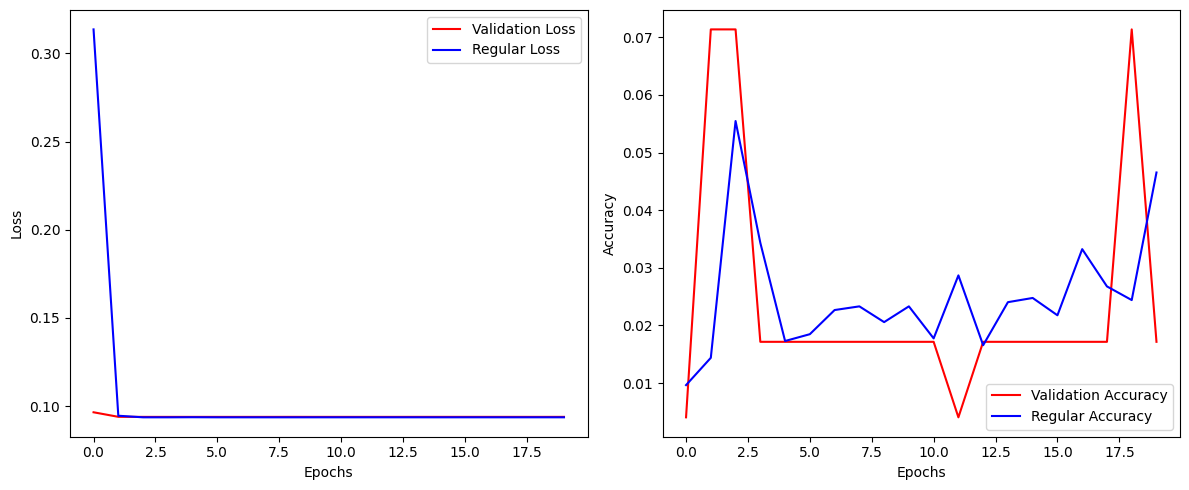

In [7]:
# CNN_Model.train(np.array(a.CNN_Train_Data[0])[0], np.array(a.CNN_Train_Data[1])[0], np.array(a.CNN_Train_Data[2])[0], np.array(a.CNN_Train_Data[3])[0])
CNN_Model = LFV_CNN()
CNN_Model.train(np.array(a.CNN_Train_Data[0]), np.array(a.CNN_Train_Data[1]), np.array(a.CNN_Train_Data[2]), np.array(a.CNN_Train_Data[3]), epochs=20)

In [ ]:
input_array = np.random.rand(128, 259).reshape(1, 128, 259, 1)
print(input_array.shape)
output_vector = CNN_Model.model.predict(input_array)

print(output_vector)

In [ ]:
np.array(a.CNN_Train_Data[1]).shape